<a href="https://colab.research.google.com/github/dimpupradev/base/blob/main/cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Define image size and batch size
IMG_SIZE = 224
BATCH_SIZE = 32

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
train_datagen = ImageDataGenerator( rescale=1./255, validation_split=0.2)

In [5]:
train_generator = train_datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/jashuva/archive/melanoma_cancer_dataset/train',
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='training'
)

Found 7684 images belonging to 2 classes.


In [6]:
val_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/Colab Notebooks/jashuva/archive/melanoma_cancer_dataset/train',
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='validation'
)

Found 1921 images belonging to 2 classes.


In [7]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    '/content/drive/MyDrive/Colab Notebooks/jashuva/archive/melanoma_cancer_dataset/test',
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

Found 1000 images belonging to 2 classes.


In [8]:
# Define the model
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

In [9]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [11]:
history = model.fit(train_generator,validation_data=val_generator,epochs=1)

241/241 [==============================] - 4260s 18s/step - loss: 0.3509 - accuracy: 0.8497 - val_loss: 0.2942 - val_accuracy: 0.8803


In [13]:
model.save("Model.h5","label.txt")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1/1 [==============================] - 0s 152ms/step


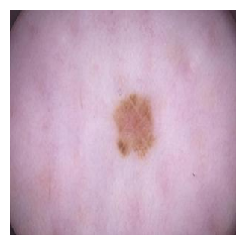

Prediction: you have benign disease (Probability: 0.18564127 )


In [15]:
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
# Load the saved model
model = load_model('/content/Model.h5')
# Load and preprocess the test image
test_image_path = '/content/drive/MyDrive/Colab Notebooks/jashuva/archive/melanoma_cancer_dataset/test/benign/melanoma_10000.jpg'
img = image.load_img(test_image_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
img_array /= 255.  # Normalize the pixel values
# Make predictions
prediction = model.predict(img_array)
#print the input image
plt.subplot(1,2,1)
plt.imshow(img)
plt.axis('off')
plt.show()
# Print the prediction
if prediction < 0.5:
    print("Prediction: you have benign disease (Probability:", prediction[0][0], ")")
else:
    print("Prediction: you have melanoma disease(Probability:", prediction[0][0], ")")

In [16]:
pip install gtts

In [18]:
from gtts import gTTS
import os

# Your medical report text
if prediction>0.5:
  text = "you have malignant skin disease"
else:
  text="you have benign skin disease"

# Create a gTTS object
tts = gTTS(text=text, lang='en', slow=False)

# Save the audio file
tts.save("medical_report.mp3")

# Play the audio file
os.system("start medical_report.mp3")

32512

In [19]:
pip install reportlab

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 19.1 MB/s eta 0:00:00


In [20]:
import numpy as np
import matplotlib.pyplot as plt
from reportlab.pdfgen import canvas
from reportlab.lib.pagesizes import letter

# Example prediction value
prediction = 0.5

# Extract predicted class and confidence score
predicted_class = "Malignant" if prediction > 0.5 else "Benign"
confidence_score = prediction

# Print prediction and confidence score
print("Predicted Class:", predicted_class)
print("Confidence Score:", confidence_score)

# Convert prediction information to a text message
text_message = f"The predicted class is {predicted_class} with a confidence score of {confidence_score:.2f}."

# Save the plot as an image
plt.plot([1, 2, 3], [1, 2, 3])  # Example plot
plt.savefig('medical_image.png')
plt.close()

# Generate PDF report
with open("medical_report.pdf", "wb") as f:
    c = canvas.Canvas(f, pagesize=letter)
    c.drawString(100, 700, "Medical Report")
    c.drawString(100, 680, f"Predicted Class: {predicted_class}")
    c.drawString(100, 660, f"Confidence Score: {confidence_score:.2f}")
    c.drawImage("medical_image.png", 100, 400, width=300, height=200)
    c.save()

print("Medical report generated.")

Predicted Class: Benign
Confidence Score: 0.5
Medical report generated.
